In [10]:
# !pip install -U scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### RUBERT

In [2]:
df = pd.read_csv("rubert_collected_data_with_sentiment.csv", index_col=0)

In [3]:
df

,Name,Date,Review,Rating,Developer,Site,True_santiment,Sentiment
0,Никита,2025-02-28,Мы живем в арендованной квартире 8 лет. Вернее...,5.0,samolet,novostroy,1,positive
1,Галина,2025-02-26,При покупке студии в Молжаниново была завышена...,1.0,samolet,novostroy,-1,negative
2,Наталья,2025-02-19,"Удачно переехали в Горки парк, сейчас вот ждем...",5.0,samolet,novostroy,1,positive
3,Валентина Гвоздилова,2025-02-14,Живем с мужем и сыном в ЖК Большое Путилково у...,5.0,samolet,novostroy,1,positive
4,Дмитрий Усачин,2025-02-08,Мне комфортно в Новом Внукове от Самолёта. Дом...,5.0,samolet,novostroy,1,positive
...,...,...,...,...,...,...,...,...
1846,Елена197967,2018-06-25,Купили квартиру и очень пожалели. 1. Гранель н...,1.0,granel,otzovik,-1,negative
1847,Алексей Ильичёв,2019-02-18,Ночь 3.51 жена говорит у нас крыша взлетает) К...,1.0,granel,otzovik,0,negative
1848,Елена7779898,2018-04-11,Решила купить квартиру и сразу начались пробле...,1.0,granel,otzovik,-1,neutral
1849,polinavoda,2019-11-06,"Брали квартиру без отделки, поэтому, конечно, ...",5.0,granel,otzovik,1,positive


In [4]:
df["True_santiment"].value_counts()

True_santiment
 1    848
-1    692
 0    311
Name: count, dtype: int64

In [5]:
df["Sentiment"].value_counts()

Sentiment
positive    673
neutral     609
negative    569
Name: count, dtype: int64

In [39]:
# Преобразуем предсказанные значения в числовой формат
sentiment_mapping = {"positive": 1, "neutral": 0, "negative": -1}
df["Predicted_santiment"] = df["Sentiment"].map(sentiment_mapping)

In [40]:
# Посчитаем accuracy
accuracy = accuracy_score(df["True_santiment"], df["Predicted_santiment"])
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.60


In [41]:
# Построим confusion matrix
conf_matrix = confusion_matrix(df["True_santiment"], df["Predicted_santiment"])

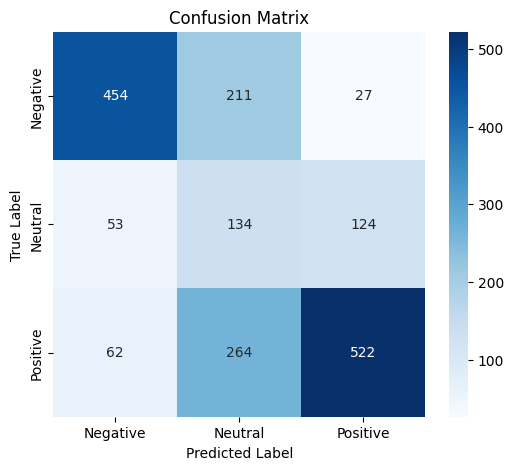

In [42]:
# Визуализация confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Модель в целом хорошо классифицирует Negative и Positive, но очень плохо классифицирует Neutral.

    - Особенно большая проблема с классом Neutral (много ошибок).
    
    - Вероятно, нейтральные отзывы содержат слова, которые схожи с негативными или позитивными.



- Модель в целом работает, но очень плохо выделяет нейтральные отзывы – вероятно, потому что они пересекаются по смыслу с негативными и позитивными.

In [43]:
# Создадим DataFrame с правильными и неправильными предсказаниями
df["Correct"] = df["True_santiment"] == df["Predicted_santiment"]
correct_counts = df["Correct"].value_counts()


/var/folders/43/rsc11w1d66s1zp7j_p4qkq600000gn/T/ipykernel_99181/512351401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correct_counts.index.astype(str), y=correct_counts.values, palette="viridis")


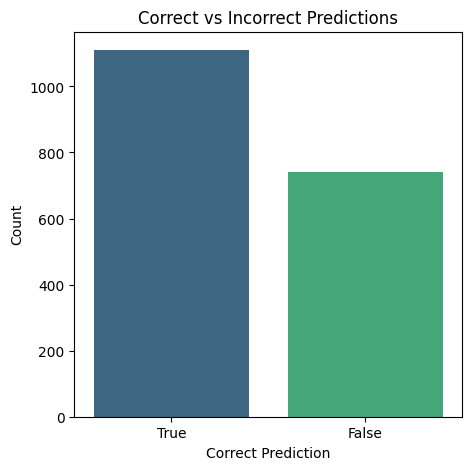

In [44]:


# График правильных/неправильных предсказаний
plt.figure(figsize=(5, 5))
sns.barplot(x=correct_counts.index.astype(str), y=correct_counts.values, palette="viridis")
plt.xlabel("Correct Prediction")
plt.ylabel("Count")
plt.title("Correct vs Incorrect Predictions")
plt.show()

In [45]:
# Выведем классификационный отчет
print("Classification Report:\n", classification_report(df["True_santiment"], df["Predicted_santiment"]))


Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.66      0.72       692
           0       0.22      0.43      0.29       311
           1       0.78      0.62      0.69       848

    accuracy                           0.60      1851
   macro avg       0.60      0.57      0.57      1851
weighted avg       0.69      0.60      0.63      1851



- Класс -1 (отрицательный)

- Класс 0 (нейтральный)

- Класс 1 (положительный)

Разберем метрики:

    1. Precision (Точность): Доля правильно предсказанных примеров данного класса среди всех, которым модель присвоила этот класс.

        Для класса -1: 0.80 (80% предсказаний, сделанных как -1, оказались верными).

        Для класса 0: 0.22 (очень низкая точность, модель часто ошибается при предсказании 0).

        Для класса 1: 0.78 (78% предсказаний 1 были верными).

    Recall (Полнота): Доля правильно предсказанных примеров данного класса среди всех фактических примеров этого класса.

        Для класса -1: 0.66 (только 66% реальных -1 были правильно предсказаны).

        Для класса 0: 0.43 (модель находит только 43% примеров 0, плохо выделяет нейтральные отзывы).

        Для класса 1: 0.62 (62% реальных 1 были правильно определены).

    F1-score: Среднее гармоническое между precision и recall.

        Для класса -1: 0.72 (достаточно сбалансирован).

        Для класса 0: 0.29 (очень слабый, модель не справляется с нейтральными отзывами).

        Для класса 1: 0.69 (в целом, неплохо).

    Accuracy (Общая точность): 0.60 (то есть 60% всех предсказаний были верными).

    Macro average (среднее арифметическое по классам):

        Precision: 0.60

        Recall: 0.57
        F1-score: 0.57

        Учитывает все классы одинаково, поэтому сильно страдает из-за плохого качества для класса 0.

    Weighted average (взвешенное среднее по классам):

        Precision: 0.69

        Recall: 0.60

        F1-score: 0.63

        Взвешенное среднее учитывает количество примеров в каждом классе (самый частый класс вносит больший вклад).




- Модель лучше всего предсказывает классы -1 (негативные) и 1 (позитивные), но плохо справляется с классом 0 (нейтральные отзывы).

- Precision и recall для класса 0 очень низкие, что говорит о том, что модель либо путает нейтральные отзывы с позитивными/негативными, либо просто плохо выделяет их признаки.